# Notebook's content
1. [Importing libraries](#0)
2. [Split dataset](#1)
3. [Loading data](#2)
3. [Dataset overview](#3)
4. [Images pre-processing](#4)
5. [CNN Model](#5)

<a id="0"></a> <br>
# Importing libraries

In [1]:
# First we will import neccessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import cv2 as cv
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.layers import Lambda
from PIL import Image

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

# Split dataset into train , val and test sets
<a id="1"></a> <br>

<a id="2"></a> <br>

In [2]:
#load train data
path = "/kaggle/input/brain-tumor-mri-dataset/Training"
key_value= dict()
for i in os.listdir(path):
    if os.path.isdir(os.path.join(path, i)):
        key_value[i] = os.listdir(os.path.join(path, i))
df = []
for key in key_value.keys():
    for j in key_value[key]:
        df.append([key,os.path.join(path, key, j)])
df1 = pd.DataFrame(df,columns=('label','path'))

In [3]:
#load train data
path = "/kaggle/input/brain-tumor-classification-mri/Training"
key_value= dict()
for i in os.listdir(path):
    if os.path.isdir(os.path.join(path, i)):
        key_value[i] = os.listdir(os.path.join(path, i))
df = []
for key in key_value.keys():
    for j in key_value[key]:
        df.append([key,os.path.join(path, key, j)])
df2 = pd.DataFrame(df,columns=('label','path'))

import pandas as pd

df2['label'] = df2['label'].replace({
    'glioma_tumor': 'glioma',
    'no_tumor': 'notumor',
    'meningioma_tumor': 'meningioma',
    'pituitary_tumor': 'pituitary'
})



<a id="3"></a> <br>

In [4]:
df2

,label,path
0,notumor,/kaggle/input/brain-tumor-classification-mri/T...
1,notumor,/kaggle/input/brain-tumor-classification-mri/T...
2,notumor,/kaggle/input/brain-tumor-classification-mri/T...
3,notumor,/kaggle/input/brain-tumor-classification-mri/T...
4,notumor,/kaggle/input/brain-tumor-classification-mri/T...
...,...,...
2865,glioma,/kaggle/input/brain-tumor-classification-mri/T...
2866,glioma,/kaggle/input/brain-tumor-classification-mri/T...
2867,glioma,/kaggle/input/brain-tumor-classification-mri/T...
2868,glioma,/kaggle/input/brain-tumor-classification-mri/T...


In [5]:
df = pd.concat([df1, df2], axis=0)
df

,label,path
0,pituitary,/kaggle/input/brain-tumor-mri-dataset/Training...
1,pituitary,/kaggle/input/brain-tumor-mri-dataset/Training...
2,pituitary,/kaggle/input/brain-tumor-mri-dataset/Training...
3,pituitary,/kaggle/input/brain-tumor-mri-dataset/Training...
4,pituitary,/kaggle/input/brain-tumor-mri-dataset/Training...
...,...,...
2865,glioma,/kaggle/input/brain-tumor-classification-mri/T...
2866,glioma,/kaggle/input/brain-tumor-classification-mri/T...
2867,glioma,/kaggle/input/brain-tumor-classification-mri/T...
2868,glioma,/kaggle/input/brain-tumor-classification-mri/T...


In [6]:
df.describe()

,label,path
count,8582,8582
unique,4,8582
top,pituitary,/kaggle/input/brain-tumor-mri-dataset/Training...
freq,2284,1


In [7]:
'''#load val data
path2 = "/kaggle/working/dataset/val"
key_value= dict()
for i in os.listdir(path2):
    if os.path.isdir(os.path.join(path2, i)):
        key_value[i] = os.listdir(os.path.join(path2, i))
dfv = []
for key in key_value.keys():
    for j in key_value[key]:
        dfv.append([key,os.path.join(path2, key, j)])
df2 = pd.DataFrame(dfv,columns=('label','path2'))
df2'''

'#load val data\npath2 = "/kaggle/working/dataset/val"\nkey_value= dict()\nfor i in os.listdir(path2):\n    if os.path.isdir(os.path.join(path2, i)):\n        key_value[i] = os.listdir(os.path.join(path2, i))\ndfv = []\nfor key in key_value.keys():\n    for j in key_value[key]:\n        dfv.append([key,os.path.join(path2, key, j)])\ndf2 = pd.DataFrame(dfv,columns=(\'label\',\'path2\'))\ndf2'


<a id="4"></a> <br>
# Images pre-processing

In [8]:
images = []
labels = []
for path, label in zip(df['path'], df['label']):
    try:
        img = cv.imread(path)
        img = cv.resize(img, (150, 150))
        img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        if img is not None:
            images.append(img)
            labels.append(label)
        else:
            print(f"Image at path {path} is None")
    except Exception as e:
        print(f"Error reading or resizing image at path: {path}")
        print(f"Error message: {str(e)}")

images = np.array(images, dtype='float')
#_, images = cv.threshold(images, 127, 255, cv.THRESH_BINARY)
labels = np.array(labels)

le = preprocessing.LabelEncoder()
y_labels = le.fit_transform(labels)

# Split the data into training and testing
train_images= images
train_ls= y_labels
# Convert images to RGB color space
train_images_rgb = np.repeat(train_images[..., np.newaxis], 3, -1)

# Normalize images
train_images_normalized = train_images / 255.0


# CNN Model
<a id="5"></a> <br>

In [9]:
import gc

# Manually run garbage collection
gc.collect()


0

In [10]:
import tensorflow as tf

# Check if TensorFlow sees the GPU
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"Num GPUs Available: {len(gpus)}")
else:
    print("No GPU found, using CPU.")


Num GPUs Available: 1


In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.regularizers import l2

model = keras.Sequential([
    keras.layers.Conv2D(filters=128, kernel_size=3, strides=1, activation='relu', kernel_initializer='he_normal', 
                        input_shape=(150, 150, 1), kernel_regularizer=l2(0.001)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=2, strides=2),

    keras.layers.Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu', kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
   # keras.layers.MaxPool2D(pool_size=2, strides=1),

    #keras.layers.BatchNormalization(),
    
    keras.layers.GlobalAveragePooling2D(),
    
    keras.layers.Dense(units=128, activation='relu', kernel_initializer='he_normal'),
    #keras.layers.Dropout(0.5),

    keras.layers.Dense(units=4, activation='softmax')
])

# Callbacks
es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)

# Optimizer
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.001)

# Compile the model
model.compile(optimizer=opt,
              loss='SparseCategoricalCrossentropy',
              metrics=['accuracy'])

# Model summary for a quick overview
#model.summary()


In [12]:

# Fit the model
model.fit(train_images_normalized, train_ls, epochs=50, batch_size=64)


135/135 [==============================] - 18s 79ms/step - loss: 0.9479 - accuracy: 0.7137


In [13]:
'''from sklearn.metrics import accuracy_score

# Make predictions on the test data
predictions = model.predict(test_images_normalized)

# Convert the predictions to the class labels
predicted_labels = np.argmax(predictions, axis=1)

# Compute the accuracy score
accuracy = accuracy_score(test_labels, predicted_labels)

print('Accuracy:', accuracy)'''

"from sklearn.metrics import accuracy_score\n\n# Make predictions on the test data\npredictions = model.predict(test_images_normalized)\n\n# Convert the predictions to the class labels\npredicted_labels = np.argmax(predictions, axis=1)\n\n# Compute the accuracy score\naccuracy = accuracy_score(test_labels, predicted_labels)\n\nprint('Accuracy:', accuracy)"

# Test set pre-processing

In [14]:
import gc

# Manually run garbage collection
gc.collect()


770

In [15]:
path = "/kaggle/input/brain-tumor-mri-dataset/Testing"
key_value= dict()
for i in os.listdir(path):
    if os.path.isdir(os.path.join(path, i)):
        key_value[i] = os.listdir(os.path.join(path, i))
dft1 = []
for key in key_value.keys():
    for j in key_value[key]:
        dft1.append([key,path+'/'+key+'/'+j])
dft1 = pd.DataFrame(dft1,columns=('label','path'))

In [16]:
#load train data
path = "/kaggle/input/brain-tumor-classification-mri/Testing"
key_value= dict()
for i in os.listdir(path):
    if os.path.isdir(os.path.join(path, i)):
        key_value[i] = os.listdir(os.path.join(path, i))
dft2 = []
for key in key_value.keys():
    for j in key_value[key]:
        dft2.append([key,os.path.join(path, key, j)])
dft2 = pd.DataFrame(dft2,columns=('label','path'))

import pandas as pd

dft2['label'] = dft2['label'].replace({
    'glioma_tumor': 'glioma',
    'no_tumor': 'notumor',
    'meningioma_tumor': 'meningioma',
    'pituitary_tumor': 'pituitary'
})



In [17]:
dft = pd.concat([dft1, dft2], axis=0)


In [18]:
images = []
labels = []
for path, label in zip(dft['path'], dft['label']):
    try:
        img = cv.imread(path)
        img = cv.resize(img, (150, 150))
        img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        if img is not None:
            images.append(img)
            labels.append(label)
        else:
            print(f"Image at path {path} is None")
    except Exception as e:
        print(f"Error reading or resizing image at path: {path}")
        print(f"Error message: {str(e)}")

images = np.array(images, dtype='float')
#_, images = cv.threshold(images, 127, 255, cv.THRESH_BINARY)
labels = np.array(labels)

le = preprocessing.LabelEncoder()
y_labels = le.fit_transform(labels)
# Split the data into training and testing
test_images= images
test_labels= y_labels
# Convert images to RGB color space
test_images_rgb = np.repeat(test_images[..., np.newaxis], 3, -1)

# Normalize images
test_images_normalized = test_images / 255.0


In [19]:
from sklearn.metrics import accuracy_score

# Make predictions on the test data
predictions = model.predict(test_images_normalized)

# Convert the predictions to the class labels
predicted_labels = np.argmax(predictions, axis=1)

# Compute the accuracy score
accuracy = accuracy_score(test_labels, predicted_labels)

print('Accuracy:', accuracy)

54/54 [==============================] - 1s 12ms/step
Accuracy: 0.26158357771261


In [20]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(test_labels, predicted_labels)

from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder


# Assuming y_true is the true labels and y_pred is the predicted labels
print(classification_report(test_labels, predicted_labels))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       400
           1       0.00      0.00      0.00       421
           2       0.58      0.14      0.23       510
           3       0.24      1.00      0.38       374

    accuracy                           0.26      1705
   macro avg       0.20      0.29      0.15      1705
weighted avg       0.23      0.26      0.15      1705



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


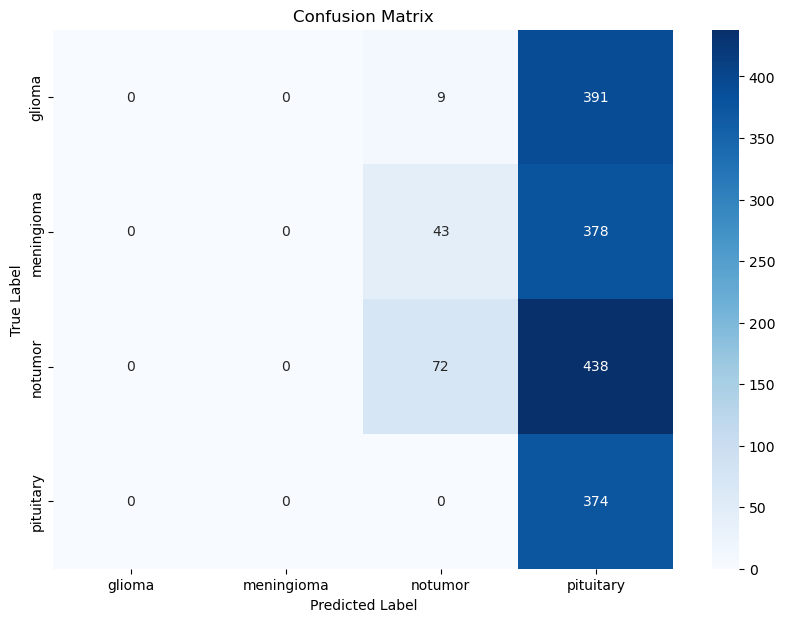

              precision    recall  f1-score   support

      glioma       0.00      0.00      0.00       400
  meningioma       0.00      0.00      0.00       421
     notumor       0.58      0.14      0.23       510
   pituitary       0.24      1.00      0.38       374

    accuracy                           0.26      1705
   macro avg       0.20      0.29      0.15      1705
weighted avg       0.23      0.26      0.15      1705



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
import seaborn as sns

# Inverse transform the encoded labels to original class names
test_labels_original = le.inverse_transform(test_labels)
predicted_labels_original = le.inverse_transform(predicted_labels)

# Compute the confusion matrix
cm = confusion_matrix(test_labels_original, predicted_labels_original)

# Get the unique label names
class_names = le.classes_

# Plot the confusion matrix with labels
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print the classification report with actual class names
print(classification_report(test_labels_original, predicted_labels_original, target_names=class_names))

#  Saving the model

In [22]:
model.save('/kaggle/working/model.h5')


In [23]:
import gc

# Manually run garbage collection
gc.collect()


6467

In [24]:
'''import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split


# Split the data into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(train_images_rgb, train_ls, test_size=0.25, random_state=42)

# Load the pre-trained ResNet50 model
base_model = keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))



# Build the model
model = keras.Sequential([
    base_model,
    keras.layers.GlobalAveragePooling2D(), 
    
    keras.layers.Dense(units=250, activation='relu', kernel_initializer='he_normal'),
    
    # Output layer for 4-class classification
    keras.layers.Dense(units=4, activation='softmax')
])

# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),  # Use a low learning rate for fine-tuning
              loss='SparseCategoricalCrossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=20, batch_size=64, validation_data=(val_images, val_labels))

from sklearn.metrics import accuracy_score

# Make predictions on the test data
predictions = model.predict(test_images_rgb)

# Convert the predictions to the class labels
predicted_labels = np.argmax(predictions, axis=1)

# Compute the accuracy score
accuracy = accuracy_score(test_labels, predicted_labels)

print('Accuracy:', accuracy)'''

94765736/94765736 [==============================] - 4s 0us/step
Epoch 1/20
101/101 [==============================] - 66s 252ms/step - loss: 0.2308 - accuracy: 0.9169 - val_loss: 0.1882 - val_accuracy: 0.9250
Epoch 2/20
101/101 [==============================] - 21s 205ms/step - loss: 0.0320 - accuracy: 0.9904 - val_loss: 0.9366 - val_accuracy: 0.7349
Epoch 3/20
 31/101 [========>.....................] - ETA: 12s - loss: 0.0178 - accuracy: 0.9955

KeyboardInterrupt: 

In [25]:
import gc

# Manually run garbage collection
gc.collect()


1342

In [26]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score

# Split the data into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(train_images_rgb, train_ls, test_size=0.25, random_state=42)

# Load the pre-trained DenseNet121 model
base_model = keras.applications.DenseNet121(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Build the model
model = keras.Sequential([
    base_model,
    keras.layers.GlobalAveragePooling2D(), 
    
    keras.layers.Dense(units=250, activation='relu', kernel_initializer='he_normal'),
    
    # Output layer for 4-class classification
    keras.layers.Dense(units=4, activation='softmax')
])

# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),  # Use a low learning rate for fine-tuning
              loss='SparseCategoricalCrossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=25, batch_size=64, validation_data=(val_images, val_labels))

# Make predictions on the test data
predictions = model.predict(test_images_rgb)

# Convert the predictions to the class labels
predicted_labels = np.argmax(predictions, axis=1)

# Compute the accuracy score
accuracy = accuracy_score(test_labels, predicted_labels)

print('Accuracy:', accuracy)


29084464/29084464 [==============================] - 2s 0us/step
Epoch 1/20
101/101 [==============================] - 104s 304ms/step - loss: 0.2672 - accuracy: 0.9041 - val_loss: 0.2519 - val_accuracy: 0.9105
Epoch 2/20
101/101 [==============================] - 22s 222ms/step - loss: 0.0283 - accuracy: 0.9930 - val_loss: 0.0832 - val_accuracy: 0.9744
Epoch 3/20
101/101 [==============================] - 23s 223ms/step - loss: 0.0081 - accuracy: 0.9989 - val_loss: 0.0652 - val_accuracy: 0.9786
Epoch 4/20
101/101 [==============================] - 23s 223ms/step - loss: 0.0035 - accuracy: 0.9995 - val_loss: 0.0436 - val_accuracy: 0.9897
Epoch 5/20
101/101 [==============================] - 22s 219ms/step - loss: 0.0043 - accuracy: 0.9992 - val_loss: 0.0787 - val_accuracy: 0.9734
Epoch 10/20
101/101 [==============================] - 22s 218ms/step - loss: 0.0289 - accuracy: 0.9899 - val_loss: 0.3511 - val_accuracy: 0.8882
Epoch 11/20
101/101 [==============================] - 22s 218m

In [ ]:
model.save('/kaggle/working/densenet_mri.h5')
